<img src="NU.png" width ="300" height=300>
<h1 style="text-align:center">An-Najah National University</h1>
<h1 style="text-align:center">Machine Learning</h1>
&nbsp;
<h1 style="text-align:center;color:blue">House Prices - Advanced Regression Techniques</h1>
&nbsp;
<h1 style="text-align:center">By: Sabri Odeh</h1>
<h1 style="text-align:center">Supervisor: Dr. Anas Alzeer</h1>
&nbsp;
<h1 style="text-align:center">15 Oct 2021</h1>

In [1]:
#import the librares 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [552]:
#load the train data
train_set = pd.read_csv("train.csv")
train_set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [553]:
#load the train data
test_set = pd.read_csv("test.csv")
test_set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [554]:
#load the y_test data
y_test_set = pd.read_csv("result-with-best.csv")
#y_test_set=y_test_set.drop(columns=['Id'])
y_test_set


,Id,SalePrice
0,1461,105000.0
1,1462,172000.0
2,1463,189900.0
3,1464,195500.0
4,1465,191500.0
...,...,...
1454,2915,90500.0
1455,2916,71000.0
1456,2917,131000.0
1457,2918,132000.0


In [555]:
#add y_test_set value to test_set
test_set['SalePrice'] = y_test_set['SalePrice'].values
test_set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000.0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000.0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900.0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500.0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,90500.0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,71000.0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,131000.0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000.0


In [556]:
# Merge the train and test dataset
DATA=pd.concat([train_set,test_set])
DATA

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,90500.0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,71000.0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,131000.0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000.0


In [557]:
#missing data 
total = DATA.isnull().sum().sort_values(ascending=False)
percent = (DATA.isnull().sum()/DATA.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471


In [558]:
#Delete the data have missing valua more than 45%
DATA = DATA.drop((missing_data[missing_data['Percent'] > 0.45]).index,1)

In [559]:
#Clean the data
DATA=DATA.drop(columns=['Id'])

for column in DATA.columns:
        if DATA[column].dtype == 'object':
            DATA[column] = DATA[column].fillna("None")
        if DATA[column].dtype == 'int' or DATA[column].dtype == 'float':
            DATA[column] = DATA[column].fillna(DATA[column].mean())

In [560]:
#test if the data stail have missing data
total = DATA.isnull().sum().sort_values(ascending=False)
percent = (DATA.isnull().sum()/DATA.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
SalePrice,0,0.0
YearRemodAdd,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0


In [561]:
#Applied the hot encoder on the data set
DATA = pd.get_dummies(DATA)
DATA

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


<ipython-input-572-d02a3cd97494>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


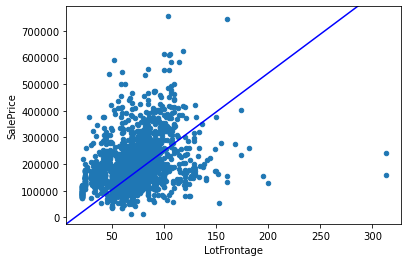

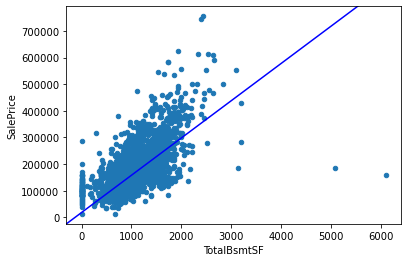

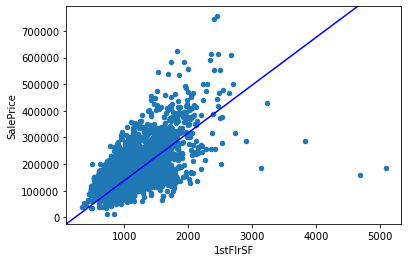

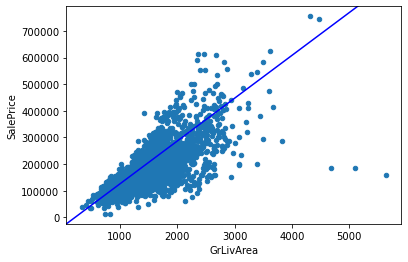

In [572]:
#Show if the function is linear function, or quadratic/cubic functions, through plot some of the features with the sale price

var = ['LotFrontage','TotalBsmtSF','1stFlrSF','GrLivArea']
for c in var:
    #data = pd.concat([DATA['SalePrice'], DATA[c]], axis=1)
    DATA.plot.scatter(x=c, y='SalePrice');
    ax = plt.axes()
    ax.plot([0, 1], [0, 1.15], transform=ax.transAxes, color='blue')

In [535]:
#Normlaize the data set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars=DATA.columns.tolist()
DATA[num_vars] = scaler.fit_transform(DATA[num_vars])

DATA

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.823529,0.000000,0.002973,0.333333,0.750,0.710145,0.333333,0.00000,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,0.823529,0.000000,0.002776,0.333333,0.500,0.710145,0.333333,0.00000,0.044649,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,0.000000,0.476027,0.087406,0.444444,0.750,0.637681,0.766667,0.00000,0.216867,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,0.382353,0.140411,0.042726,0.444444,0.500,0.869565,0.700000,0.00000,0.059709,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [536]:
#Separation of the data
train=DATA.iloc[:1460]
test=DATA.iloc[1460:]

In [537]:
#Separation of the data
y_train=train[['SalePrice']]
x_train=train.drop(columns=['SalePrice'])
################################
y_test=test[['SalePrice']]
x_test=test.drop(columns=['SalePrice'])


In [538]:
#show the shape for all the data
print("Shape of X_train :", x_train.shape)
print("Shape of Y_train :", y_train.shape)
print("Shape of X_test :", x_test.shape)
print("Shape of Y_test :", y_test.shape)

Shape of X_train : (1460, 287)
Shape of Y_train : (1460, 1)
Shape of X_test : (1459, 287)
Shape of Y_test : (1459, 1)


In [539]:
#Add column have one value
x_train.insert(0, "X0", np.ones(len(x_train.index)), True)
x_test.insert(0, "X0", np.ones(len(x_test.index)), True)

# linear regression model (gradient_descent)


In [100]:
# linear regression model (gradient_descent)
%matplotlib inline
def gradient_descent(x,y,alpha):
    
    m = len(x.index)
    n = len(x.columns)
    b_curr = [0] * n
    iterations = 1500
    learning_rate = alpha

    cost_previous = []
    f=range(0, iterations)
    
    for i in range(iterations):
        
        
        y_predicted=np.dot(x, b_curr)
        y_predicted=pd.DataFrame(y_predicted,columns=['SalePrice'])

        cost = (1/(2*m))*sum((y_predicted['SalePrice']-y['SalePrice'])**2)
        

        b_curr=b_curr - learning_rate*(1/m)*sum([(np.dot(y_predicted['SalePrice']-y['SalePrice'],x))]) 
        
        cost_previous.append(cost)
        
        
    plt.plot(f, cost_previous)
    plt.xlabel('No. of iterations')
    plt.ylabel('J(theta)')


    return  b_curr, cost

0.0006216217526178645

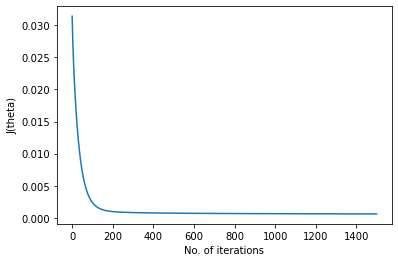

In [402]:
#plot the curve for cost function 
alpha_result1,cost_function1=gradient_descent(x_train,y_train,0.07)
cost_function1

<ipython-input-581-57a7b0dbd0af>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0, 0.5, 'y_result')

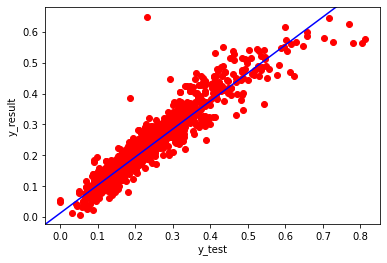

In [581]:
#plot the curve between y_test and y_result
    alpha=pd.DataFrame(alpha_result1)
    y_result=np.dot((x_test), alpha)
    y_result=pd.DataFrame(y_result,columns=['SalePrice'])
    plt.scatter(y_test,y_result ,color='red')
    ax = plt.axes()
    ax.plot([0, 1], [0, 1.15], transform=ax.transAxes, color='blue')
    plt.xlabel('y_test')
    plt.ylabel('y_result')

In [283]:
#show the Accuracy  for y_result
error = (1/x_test.shape[0])*np.sum(np.abs(y_result - y_test))
print("Test error is :", error*100, "%")
print("Test Accuracy is :", (1- error)*100, "%")

Test error is : SalePrice    2.354432
dtype: float64 %
Test Accuracy is : SalePrice    97.645568
dtype: float64 %



# Ridge Model

In [487]:
# Ridge Model
%matplotlib inline
def gradient_descent_Ridge(x,y,alpha):
    
    m = len(x.index)
    n = len(x.columns)
    b_curr = [0] * n
    iterations = 1500
    learning_rate = alpha
    lambdaa=7

    cost_previous = []
    f=range(0, iterations)
    
    b_curr_0=b_curr[1]
    b_curr_1=b_curr[1:]
    

    for i in range(iterations):
        b_curr=np.append(b_curr_0,b_curr_1)
        y_predicted=np.dot(x, b_curr)
        y_predicted=pd.DataFrame(y_predicted,columns=['SalePrice'])

        
        cost = (1/(2*m))*(sum((y_predicted['SalePrice']-y['SalePrice'])**2)+lambdaa*(sum(np.square(b_curr_1))))
        

        b_curr_0=b_curr_0 - learning_rate*(1/m)*sum([(np.dot(y_predicted['SalePrice']-y['SalePrice'],x[['X0']]))])
        
        
        b_curr_1=(np.dot(b_curr_1,(1-(learning_rate*(lambdaa/m))))) - (learning_rate*(1/m)*sum([(np.dot(y_predicted['SalePrice']-y['SalePrice'],x.iloc[:,1:]))])) 
        
        cost_previous.append(cost)
        
        
    plt.plot(f, cost_previous)
    plt.xlabel('No. of iterations')
    plt.ylabel('J(theta)')
    

    return  b_curr, cost

0.0007672373037732873

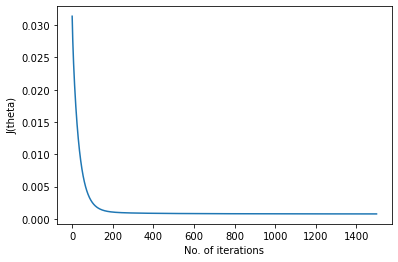

In [488]:
#plot the curve for cost function 
alpha_result2,cost_function2=gradient_descent_Ridge(x_train,y_train,0.07)
cost_function2

<ipython-input-585-110a5a60d223>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0, 0.5, 'y_result')

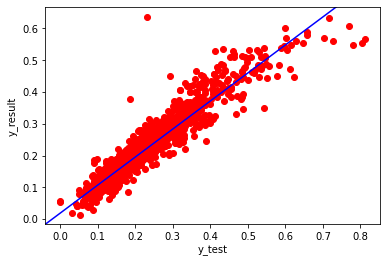

In [585]:
#plot the curve between y_test and y_result    
    alpha=pd.DataFrame(alpha_result2)
    y_result=np.dot((x_test), alpha)
    y_result=pd.DataFrame(y_result,columns=['SalePrice'])
    plt.scatter(y_test,y_result ,color='red')
    ax = plt.axes()
    ax.plot([0, 1], [0, 1.15], transform=ax.transAxes, color='blue')
    plt.xlabel('y_test')
    plt.ylabel('y_result')

In [490]:
#show the Accuracy  for y_result
error = (1/x_test.shape[0])*np.sum(np.abs(y_result - y_test))
print("Test error is :" , (error*100) )
print("Test Accuracy is :", (1- error)*100)

Test error is : SalePrice    2.33404
dtype: float64
Test Accuracy is : SalePrice    97.66596
dtype: float64


# Lasso Model

In [403]:
# Lasso Model
%matplotlib inline
def gradient_descent_Lasso(x,y,alpha):
    
    n = len(x.columns)
    m= len(x.index)
    b_curr = [0] * n
    iterations = 1500
    learning_rate = alpha
    lambdaa=0.5

    cost_previous = []
    f=range(0, iterations)
    
    b_curr_0=b_curr[1]
    b_curr_1=b_curr[1:]
    

    for i in range(iterations):
        b_curr=np.append(b_curr_0,b_curr_1)
        y_predicted=np.dot(x, b_curr)
        y_predicted=pd.DataFrame(y_predicted,columns=['SalePrice'])

    
        h=y_predicted['SalePrice']-y_train['SalePrice']
        
        cost = (1/(2*m))*(sum((h)**2)+lambdaa*(sum(np.abs(b_curr_1))))

        b_curr_0=b_curr_0 - learning_rate*(1/m)*sum([(np.dot(h,x.iloc[:,0]))])
        for j in range(0,n-1):
            if (b_curr_1[j] >=0):
                b_curr_1[j]= (b_curr_1[j])+ (learning_rate*(lambdaa/(2*m)))- (learning_rate*(1/m)*sum([(np.dot(h,x.iloc[:,j+1]))]))
            else: 
                b_curr_1[j]= (b_curr_1[j])- (learning_rate*(lambdaa/(2*m)))- (learning_rate*(1/m)*sum([(np.dot(h,x.iloc[:,j+1]))])) 
        
        cost_previous.append(cost)
        
        
    plt.plot(f, cost_previous)
    plt.xlabel('No. of iterations')
    plt.ylabel('J(theta)')
    

    return  b_curr, cost

0.0012058761501948154

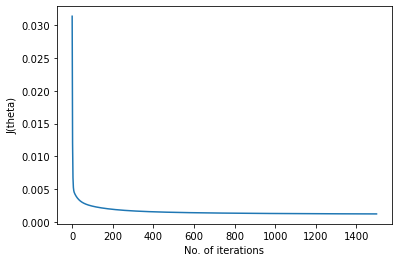

In [409]:
#plot the curve for cost function 
alpha_result3,cost_function3= gradient_descent_Lasso(x_train,y_train,0.01)
cost_function3

<ipython-input-573-28d11de6e9b4>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0, 0.5, 'y_result')

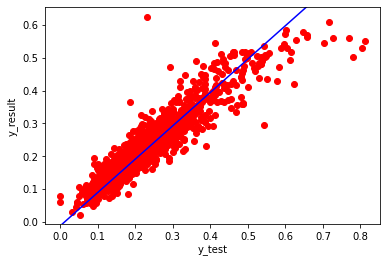

In [573]:
#plot the curve between y_test and y_result
    alpha=pd.DataFrame(alpha_result3)
    y_result=np.dot((x_test), alpha)
    y_result=pd.DataFrame(y_result,columns=['SalePrice'])
    plt.scatter(y_test,y_result ,color='red')
    ax = plt.axes()
    ax.plot([0.05, 1], [0, 1.3], transform=ax.transAxes, color='blue')
    plt.xlabel('y_test')
    plt.ylabel('y_result')

In [412]:
#show the Accuracy  for y_result
error = (1/x_test.shape[0])*np.sum(np.abs(y_result - y_test))
print("Test error is :", error*100, "%")
print("Test Accuracy is :", (1- error)*100, "%")

Test error is : SalePrice    2.707466
dtype: float64 %
Test Accuracy is : SalePrice    97.292534
dtype: float64 %


In [589]:
#show the SalePrice predicte
test[["SalePrice"]]=y_result[['SalePrice']]
num_vars=test.columns.tolist()
test= scaler.inverse_transform(test[num_vars])
test=pd.DataFrame(test, columns=num_vars)
y_test_set[["SalePrice"]]=test[['SalePrice']]
y_test_set

,Id,SalePrice
0,1461,107678.342672
1,1462,149207.456557
2,1463,173791.737780
3,1464,187868.008387
4,1465,196406.196639
...,...,...
1454,2915,74385.370704
1455,2916,78418.470932
1456,2917,156506.540954
1457,2918,107494.622988


In [551]:
#save the value predicte in csv 
y_test_set.to_csv("predicted.csv")